<a href="https://colab.research.google.com/github/nabihafaisal/Dynamic-Weather-Impact-on-Retail-Sales-Machine-Learning/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, KFold, cross_val_score

import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.decomposition import PCA

In [ ]:
df_train=pd.read_csv('/content/training_data.csv')
df_test=pd.read_csv('/content/testing_data.csv')

In [ ]:
print("Number of rows in training set: {}".format(len(df_train)))


Number of rows in training set: 15000


In [ ]:
df_train.head()

,Date,Store_ID,Product_Category,Daily_Sales,Temperature,Rainfall,Humidity,Wind_Speed,Weather_Condition
0,2022-08-07 01:21:36,4,Electronics,4281,21.737444,18.782488,46.730572,8.767423,Rainy
1,2023-12-25 13:24:34,2,Beverages,3901,31.988128,9.259242,80.852541,16.878578,Rainy
2,2023-12-19 03:19:35,3,Beverages,1945,21.362592,6.553352,41.790911,20.649769,Sunny
3,2022-10-14 00:45:25,5,Beverages,1363,24.777099,19.369159,81.228123,24.480433,Sunny
4,2022-02-26 19:43:43,1,Clothing,3314,28.176562,14.463581,83.364466,12.877632,Sunny


**PREPROCESSING OF DATA**

In [ ]:
df_train['Daily_Sales'].describe()

,Daily_Sales
count,15000.000000
mean,2648.499133
std,1809.280287
min,100.000000
25%,1337.000000
50%,2554.500000
75%,3797.250000
max,19995.000000


**HANDLING MISSING VALUES**

In [ ]:
missing_count=df_train.isna().sum()
print(missing_count)


Date                   0
Store_ID               0
Product_Category       0
Daily_Sales            0
Temperature          294
Rainfall             333
Humidity               0
Wind_Speed             0
Weather_Condition      0
dtype: int64


**REMOVING UNWANTED COLUMNS**

In [ ]:
missing_count=df_test.isna().sum()
print(missing_count)


Date                   0
Store_ID               0
Product_Category       0
Temperature            0
Rainfall               0
Humidity               0
Wind_Speed             0
Weather_Condition      0
Unnamed: 8           300
Unnamed: 9           300
Unnamed: 10          300
Unnamed: 11          300
Unnamed: 12          276
Unnamed: 13          279
Unnamed: 14          279
Unnamed: 15          279
dtype: int64


In [ ]:
df_test.drop(['Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15'], axis=1, inplace=True)
df_test.head()

,Date,Store_ID,Product_Category,Temperature,Rainfall,Humidity,Wind_Speed,Weather_Condition
0,6/22/2022 20:49,3,Beverages,26.106182,5.343010,51.342935,10.073698,Rainy
1,1/8/2022 23:00,2,Clothing,23.790370,14.283077,80.411678,15.341726,Rainy
2,4/18/2023 10:32,2,Electronics,29.235643,16.219582,82.512688,9.985604,Cloudy
3,12/15/2023 23:47,4,Electronics,23.004811,16.103989,85.340375,17.684905,Cloudy
4,6/12/2022 19:11,2,Snacks,34.966646,5.771478,68.244366,16.907885,Sunny


**FEATURE ENGINEERING**

In [ ]:
# Convert 'Date' column to datetime format in the test dataset
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Extract the same time-based features as in training
df_train['Day_of_Week'] = df_train['Date'].dt.dayofweek
df_train['Is_Weekend'] = df_train['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day
df_train['Week_of_Year'] = df_train['Date'].dt.isocalendar().week

# Map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_train['Season'] = df_train['Month'].apply(get_season)



In [ ]:
# Convert 'Date' column to datetime format in the test dataset
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Extract the same time-based features as in training
df_test['Day_of_Week'] = df_test['Date'].dt.dayofweek
df_test['Is_Weekend'] = df_test['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)
df_test['Month'] = df_test['Date'].dt.month
df_test['Day'] = df_test['Date'].dt.day
df_test['Week_of_Year'] = df_test['Date'].dt.isocalendar().week

# Map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_test['Season'] = df_test['Month'].apply(get_season)



**FILLING MISSING VALUES WITH MEAN VALUES**

In [ ]:
df_train['Temperature'] = df_train['Temperature'].fillna(df_train['Temperature'].mean())
df_train['Rainfall'] = df_train['Rainfall'].fillna(df_train['Rainfall'].mean())

**IDENTIFYING OUTLIERS**

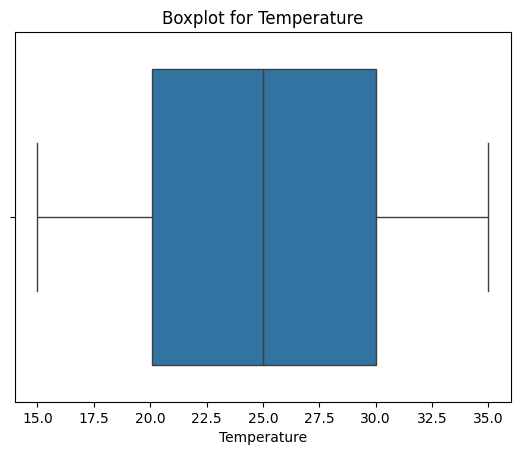

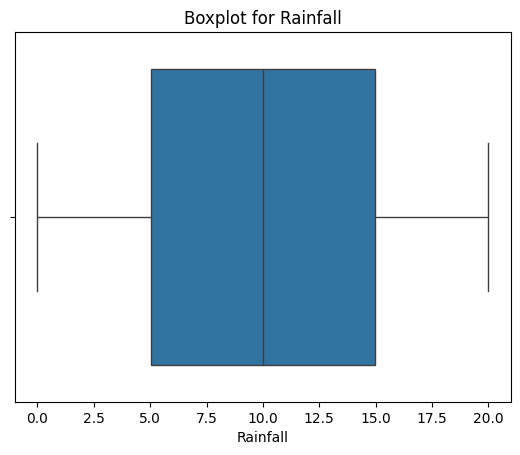

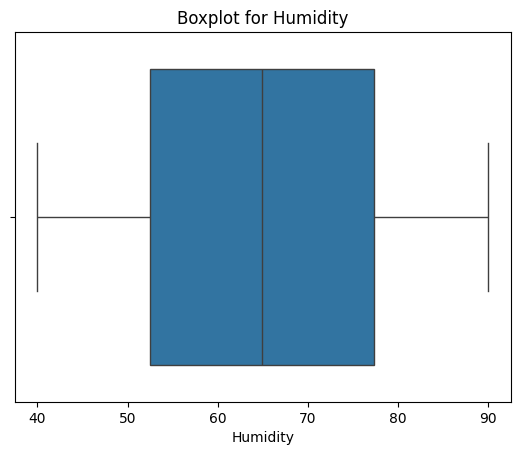

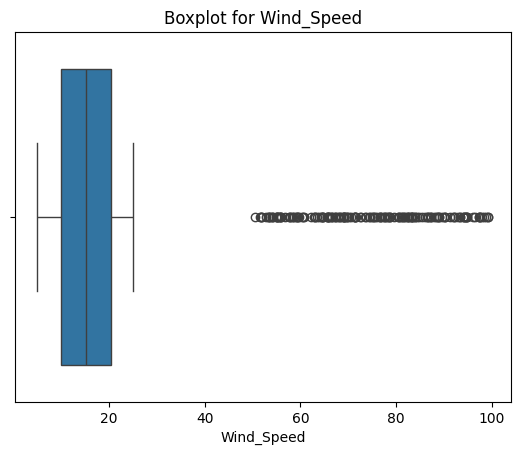

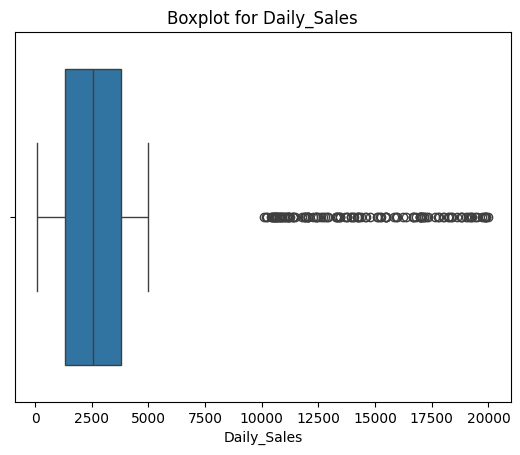

In [ ]:
numerical_features = ['Temperature', 'Rainfall', 'Humidity', 'Wind_Speed','Daily_Sales']
for feature in numerical_features:
    sns.boxplot(data=df_train, x=feature)
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [ ]:
print(df_train['Wind_Speed'].describe())

count    15000.000000
mean        15.712970
std          8.655761
min          5.002048
25%         10.017546
50%         15.126216
75%         20.322789
max         99.265949
Name: Wind_Speed, dtype: float64


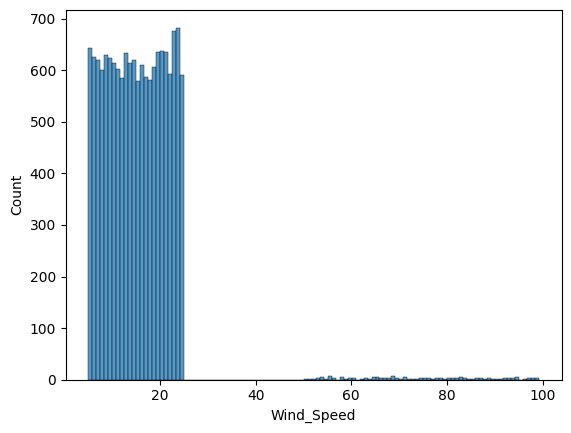

In [ ]:
sns.histplot(data=df_train, x="Wind_Speed")
plt.show()

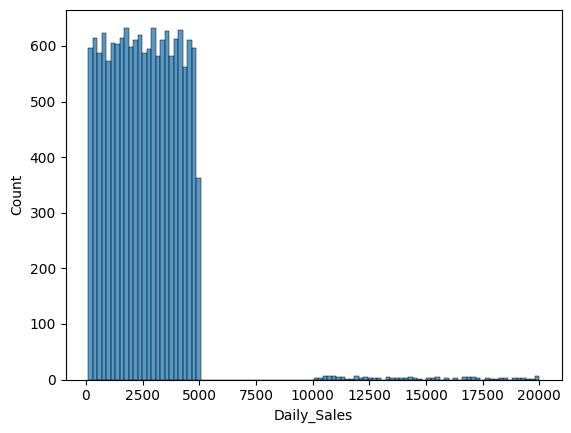

In [ ]:
sns.histplot(data=df_train, x="Daily_Sales")
plt.show()

**HANDLING OUTLIERS**

In [ ]:
# Find the 75th and 25th percentiles
price_seventy_fifth = df_train["Wind_Speed"].quantile(0.75)
price_twenty_fifth = df_train["Wind_Speed"].quantile(0.25)

wind_iqr=price_seventy_fifth - price_twenty_fifth
print(wind_iqr)

# Upper
thresholdupper = price_seventy_fifth + (1.5 * wind_iqr)# Lower
thresholdlower = price_twenty_fifth - (1.5 * wind_iqr)
print(thresholdupper, thresholdlower)
# Calculate thresholds
# Cap the outliers
df_train['Wind_Speed'] = df_train['Wind_Speed'].clip(lower=thresholdlower, upper=thresholdupper)



10.305243524679794
35.780654760296215 -5.440319338422958


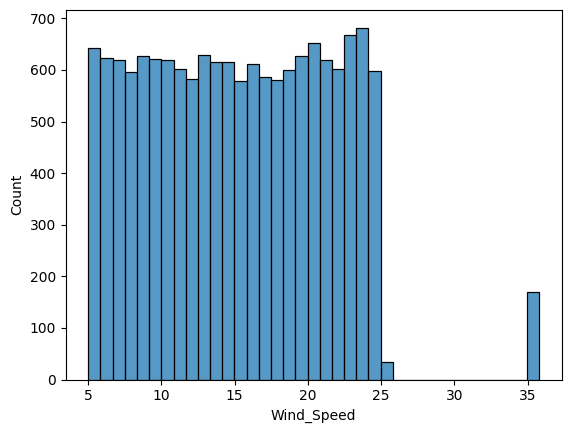

In [ ]:
sns.histplot(data=df_train, x="Wind_Speed")
plt.show()

In [ ]:
# # df_train[(df_train["Wind_Speed"] < thresholdlower) | (df_train["Wind_Speed"] > thresholdupper)]/[["Temperature", "Rainfall", "Wind_Speed"]]
# df_train[(df_train["Wind_Speed"] < thresholdlower) | (df_train["Wind_Speed"] > thresholdupper)][["Temperature", "Rainfall", "Wind_Speed"]]

In [ ]:
import numpy as np

def winsorize(data, limits=(0.05, 0.05)):
    """Winsorizes a data array by capping outliers at specified percentiles.

    Args:
        data: The data array to winsorize.
        limits: A tuple of (lower percentile, upper percentile) for capping.

    Returns:
        The winsorized data array.
    """
    lower_limit = np.percentile(data, limits[0] * 100)
    upper_limit = np.percentile(data, 100 - limits[1] * 100)
    winsorized_data = np.clip(data, lower_limit, upper_limit)
    return winsorized_data

# Apply Winsorization to your 'Daily_Sales' column
df_train['Daily_Sales'] = winsorize(df_train['Daily_Sales'])

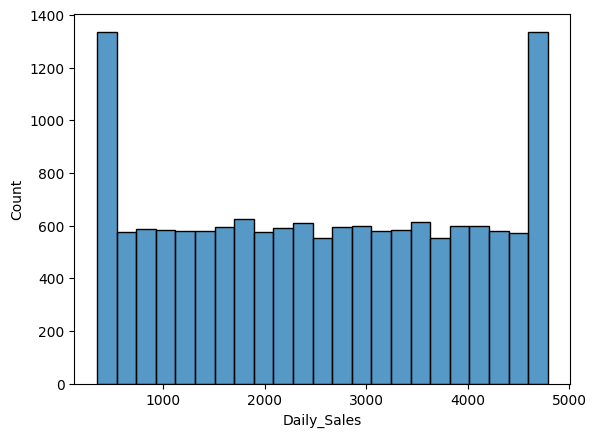

In [ ]:
sns.histplot(data=df_train, x="Daily_Sales")
plt.show()

In [ ]:
print(df_train['Wind_Speed'].describe())

count    15000.000000
mean        15.278179
std          6.192672
min          5.002048
25%         10.017546
50%         15.126216
75%         20.322789
max         35.780655
Name: Wind_Speed, dtype: float64


In [ ]:
df_train['Product_Category'].value_counts()

,count
Product_Category,
Home Supplies,3064
Snacks,3043
Electronics,2999
Clothing,2962
Beverages,2932


**CONVERTING CATEGORICAL DATA TO NUMERICAL**

In [ ]:
# # Perform One-Hot Encoding
# data = pd.get_dummies(df_train, columns=['Product_Category', 'Weather_Condition'], drop_first=True)

# # Check the updated dataset
# print(data.head())

# df_encoded = pd.get_dummies(df_train,columns=['Product_Category','Weather_Condition','Season'], dtype=int)
# df_encoded.head()
# Perform Encoding
# Perform Encoding
df_train['Product_Category'].replace(['Home Supplies','Snacks','Electronics','Clothing','Beverages'],
                        [0, 1, 2, 3, 4], inplace=True)
df_train['Weather_Condition'].replace(['Rainy','Sunny','Cloudy'],
                        [0, 1, 2], inplace=True)
df_train['Season'].replace({'Summer': 0, 'Winter': 1, 'Fall': 2, 'Spring': 3}, inplace=True)
# Use a dictionary to map season names to numerical values


# Check the updated dfset
print(df_train.head())


                 Date  Store_ID  Product_Category  Daily_Sales  Temperature  \
0 2022-08-07 01:21:36         4                 2         4281    21.737444   
1 2023-12-25 13:24:34         2                 4         3901    31.988128   
2 2023-12-19 03:19:35         3                 4         1945    21.362592   
3 2022-10-14 00:45:25         5                 4         1363    24.777099   
4 2022-02-26 19:43:43         1                 3         3314    28.176562   

    Rainfall   Humidity  Wind_Speed  Weather_Condition  Day_of_Week  \
0  18.782488  46.730572    8.767423                  0            6   
1   9.259242  80.852541   16.878578                  0            0   
2   6.553352  41.790911   20.649769                  1            1   
3  19.369159  81.228123   24.480433                  1            4   
4  14.463581  83.364466   12.877632                  1            5   

   Is_Weekend  Month  Day  Week_of_Year  Season  
0           1      8    7            31       0 

<ipython-input-81-a7870847b208>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Product_Category'].replace(['Home Supplies','Snacks','Electronics','Clothing','Beverages'],
<ipython-input-81-a7870847b208>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Product_Category'].repla

In [ ]:

# df_test = pd.get_dummies(df_test,columns=['Product_Category', 'Weather_Condition','Season'], dtype=int)

df_test['Product_Category'].replace(['Home Supplies','Snacks','Electronics','Clothing','Beverages'],
                        [0, 1, 2, 3, 4], inplace=True)
df_test['Weather_Condition'].replace(['Rainy','Sunny','Cloudy'],
                        [0, 1, 2], inplace=True)
df_test.replace({'Summer': 0, 'Winter': 1, 'Fall': 2, 'Spring': 3}, inplace=True)


df_test.head()

<ipython-input-82-513c6e59a344>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Product_Category'].replace(['Home Supplies','Snacks','Electronics','Clothing','Beverages'],
<ipython-input-82-513c6e59a344>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Product_Category'].replace([

,Date,Store_ID,Product_Category,Temperature,Rainfall,Humidity,Wind_Speed,Weather_Condition,Day_of_Week,Is_Weekend,Month,Day,Week_of_Year,Season
0,2022-06-22 20:49:00,3,4,26.106182,5.343010,51.342935,10.073698,0,2,0,6,22,25,0
1,2022-01-08 23:00:00,2,3,23.790370,14.283077,80.411678,15.341726,0,5,1,1,8,1,1
2,2023-04-18 10:32:00,2,2,29.235643,16.219582,82.512688,9.985604,2,1,0,4,18,16,3
3,2023-12-15 23:47:00,4,2,23.004811,16.103989,85.340375,17.684905,2,4,0,12,15,50,1
4,2022-06-12 19:11:00,2,1,34.966646,5.771478,68.244366,16.907885,1,6,1,6,12,23,0


In [ ]:
# df_train["Lag1"] = df_train['Daily_Sales'].shift(3)
# df_train[['Date','Daily_Sales','Lag1']].head()

In [ ]:
#df_encoded.drop(['Date'], axis=1, inplace=True)

**NORMALIZING**

In [ ]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name]-min_value) / (max_value - min_value)
    return result

train_df = normalize(df_train)
test_df = normalize(df_test)

print(train_df.head())

       Date  Store_ID  Product_Category  Daily_Sales  Temperature  Rainfall  \
0  0.298706      0.75              0.50     0.885637     0.336916  0.939229   
1  0.991248      0.25              1.00     0.800090     0.849524  0.463004   
2  0.982452      0.50              1.00     0.359748     0.318170  0.327691   
3  0.391832      1.00              1.00     0.228726     0.488920  0.968566   
4  0.077814      0.00              0.75     0.667942     0.658918  0.723255   

   Humidity  Wind_Speed  Weather_Condition  Day_of_Week  Is_Weekend     Month  \
0  0.134577    0.122337                0.0     1.000000         1.0  0.636364   
1  0.817151    0.385870                0.0     0.000000         0.0  1.000000   
2  0.035765    0.508396                0.5     0.166667         0.0  1.000000   
3  0.824664    0.632855                0.5     0.666667         0.0  0.818182   
4  0.867399    0.255879                0.5     0.833333         1.0  0.090909   

        Day  Week_of_Year    Season  


In [ ]:
train_df.head()

,Date,Store_ID,Product_Category,Daily_Sales,Temperature,Rainfall,Humidity,Wind_Speed,Weather_Condition,Day_of_Week,Is_Weekend,Month,Day,Week_of_Year,Season
0,0.298706,0.75,0.50,0.885637,0.336916,0.939229,0.134577,0.122337,0.0,1.000000,1.0,0.636364,0.200000,0.588235,0.000000
1,0.991248,0.25,1.00,0.800090,0.849524,0.463004,0.817151,0.385870,0.0,0.000000,0.0,1.000000,0.800000,1.0,0.333333
2,0.982452,0.50,1.00,0.359748,0.318170,0.327691,0.035765,0.508396,0.5,0.166667,0.0,1.000000,0.600000,0.980392,0.333333
3,0.391832,1.00,1.00,0.228726,0.488920,0.968566,0.824664,0.632855,0.5,0.666667,0.0,0.818182,0.433333,0.784314,0.666667
4,0.077814,0.00,0.75,0.667942,0.658918,0.723255,0.867399,0.255879,0.5,0.833333,1.0,0.090909,0.833333,0.137255,0.333333


In [ ]:
len(train_df)

15000

In [ ]:
# train_df['Lag1'].replace(np.nan, 0, inplace=True)
# train_df.head()

In [ ]:
test_df.head()

,Date,Store_ID,Product_Category,Temperature,Rainfall,Humidity,Wind_Speed,Weather_Condition,Day_of_Week,Is_Weekend,Month,Day,Week_of_Year,Season
0,0.236381,0.50,1.00,0.553087,0.267699,0.223490,0.251295,0.0,0.333333,0.0,0.454545,0.700000,0.470588,0.000000
1,0.010271,0.25,0.75,0.436279,0.716746,0.807927,0.516229,0.0,0.833333,1.0,0.000000,0.233333,0.0,0.333333
2,0.647130,0.25,0.50,0.710934,0.814014,0.850169,0.246865,1.0,0.166667,0.0,0.272727,0.566667,0.294118,1.000000
3,0.978328,0.75,0.50,0.396656,0.808208,0.907020,0.634070,1.0,0.666667,0.0,1.000000,0.466667,0.960784,0.333333
4,0.222577,0.25,0.25,1.000000,0.289220,0.563299,0.594993,0.5,1.000000,1.0,0.454545,0.366667,0.431373,0.000000


**Train test split**

In [ ]:
# x=train_df.drop('Daily_Sales',axis=1)
# y=train_df['Daily_Sales']
# desired_test_size = len(test_df) / len(train_df)  # 300 / 4800 = 0.0625
# print(desired_test_size)
# x_train,x_test,y_train,y_test=train_test_split(x,y,desired_test_size,random_state=30)
x = train_df.drop('Daily_Sales', axis=1)
y = train_df['Daily_Sales']

# Calculate desired_test_size as a proportion
desired_test_size = len(test_df) / len(train_df)

# Ensure desired_test_size is within the acceptable range for train_test_split
desired_test_size = min(max(desired_test_size, 0.0), 1.0)

print(desired_test_size)

# Use test_size in train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=desired_test_size, random_state=30)


0.02


**LINEAR REGRESSION**

In [ ]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Align test_df with x_train


test_df = test_df[x_train.columns]


In [ ]:
predictions=lm.predict(test_df)



**CROSS VAL SCORE**

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score
print(cross_val_score(lm, x, y, cv=5))


[-0.00167    -0.00052591 -0.0006357  -0.00190403 -0.00244778]


**DENORMALIZATION AND PREDICTION**

In [ ]:
# Get the original minimum and maximum values of 'Daily_Sales'
original_max = df_train['Daily_Sales'].max()
original_min = df_train['Daily_Sales'].min()

# Get the normalized predictions
normalized_predictions = lm.predict(test_df)

# Denormalize the predictions
denormalized_lm_predictions = normalized_predictions * (original_max - original_min) + original_min
print (denormalized_lm_predictions)


[2505.28880648 2548.85790458 2607.33315948 2583.63729956 2532.43421095
 2553.0835218  2545.94728541 2549.32621623 2597.32927289 2584.11410945
 2605.62924257 2584.47372104 2513.33245213 2516.78255484 2551.82848023
 2568.49382241 2516.96584683 2549.39923585 2521.71845893 2565.76021511
 2542.72426617 2573.57166208 2585.41332007 2552.05153128 2572.3279904
 2553.60958263 2565.85740325 2541.10421546 2599.8907512  2526.37093646
 2537.77102489 2560.22041633 2533.12537244 2537.12829451 2595.58580975
 2578.7535786  2566.22326966 2539.25745037 2578.01596253 2548.54282807
 2531.39597123 2521.33754126 2568.0439764  2603.20816033 2631.00694099
 2528.89122331 2562.85897366 2560.24055641 2591.78167198 2593.06391243
 2569.0278146  2527.99351483 2526.98538408 2526.69774996 2511.30219318
 2536.69132875 2518.35708774 2589.57220008 2546.34096926 2567.70727947
 2623.02630984 2533.33143894 2581.39789237 2569.81238921 2515.00179902
 2594.72262529 2526.15613056 2506.63655698 2566.38951493 2545.12403564
 2559.3

In [ ]:
# Assuming you have actual daily sales for the test set in y_test (if available)
# If not, skip the RMSE, MAE, and R-squared calculations

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, denormalized_lm_predictions))  # Replace denormalized_lm_predictions with denormalized_denormalized_lm_predictions if necessary
mae = mean_absolute_error(y_test, denormalized_lm_predictions)  # Replace denormalized_lm_predictions with denormalized_denormalized_lm_predictions if necessary
r2 = r2_score(y_test, denormalized_lm_predictions)  # Replace denormalized_lm_predictions with denormalized_denormalized_lm_predictions if necessary

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

RMSE: 2554.683896947907
MAE: 2554.5158902910825
R-squared: -70047877.42724504


**GRADIENT BOOSTING**

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error

# # Define RMSE scorer
# def rmse_scorer(y_true, y_pred):
#     return np.sqrt(mean_squared_error(y_test,denormalized_lm_predictions))

# # Perform cross-validation using RMSE
# scores = cross_val_score(lm, x, y, cv=5, scoring=rmse_scorer)

# print(f"Cross-Validated RMSE scores: {scores}")
# print(f"Mean RMSE: {np.mean(scores):.4f}")

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
params = {
    'n_estimators': 70,  # Number of boosting stages (trees)
    'learning_rate': 0.01,  # Step size shrinkage used in update to prevent overfitting
    'max_depth': 3,  # Maximum depth of the individual trees
    'random_state': 30  # For reproducibility
}

gb_regressor = GradientBoostingRegressor(**params)

In [ ]:
gb_regressor.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=70, random_state=30)

In [ ]:
gb_predictions = gb_regressor.predict(x_test)  # For evaluation on test set
gb_predictions_test_df = gb_regressor.predict(test_df)  # For predictions on new data

In [ ]:
denormalized_gb_predictions = gb_predictions_test_df * (original_max - original_min) + original_min

**CROSS VAL SCORE**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=30)
scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"Cross-validated RMSE: {rmse_scores.mean()}")


Cross-validated RMSE: 0.31667614660494847


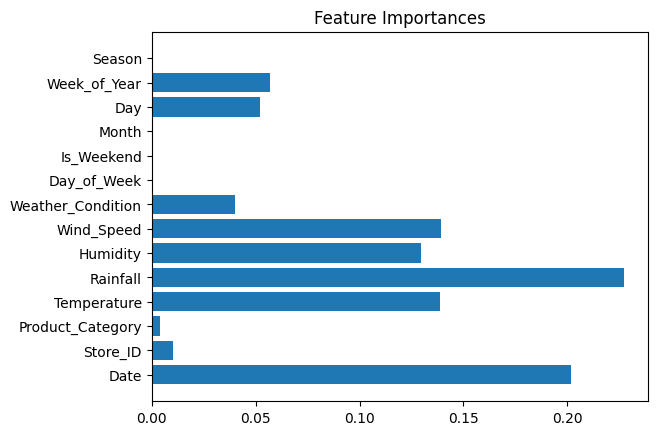

In [ ]:
import matplotlib.pyplot as plt

feature_importances = gb_regressor.feature_importances_
feature_names = x_train.columns
plt.barh(feature_names, feature_importances)
plt.title("Feature Importances")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, denormalized_gb_predictions))
mae = mean_absolute_error(y_test, denormalized_gb_predictions)
r2 = r2_score(y_test, denormalized_gb_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

RMSE: 2563.634331688429
MAE: 2563.5459430743717
R-squared: -70539568.20192483


**HYPER PARAMETER TUNING THROUGH GRID SEARCHCV**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have x_train, y_train, x_test, y_test, original_max, original_min defined

# Define the parameter grid to search
param_grid = {
    'n_estimators': [70, 100, 120],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Create a GradientBoostingRegressor object
gb_regressor = GradientBoostingRegressor(random_state=30)

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=gb_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use a suitable scoring metric
    cv=5,  # Number of cross-validation folds
    n_jobs=-1  # Use all available CPU cores
)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score (Negative MSE): {best_score}")

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
predictions = best_model.predict(test_df)

# Denormalize predictions
denormalized_predictions = predictions * (original_max - original_min) + original_min

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, denormalized_predictions))
print(f"RMSE on Test Set: {rmse}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 70}
Best Score (Negative MSE): -0.0999080447374681
RMSE on Test Set: 2563.634331688429


In [ ]:
print(cross_val_score(gb_regressor, x, y, cv=5))

[-0.00588162 -0.00569447 -0.00429763 -0.00555103 -0.00750582]


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=30)  # Using default settings

# 3. Train the model
rf_regressor.fit(x_train, y_train)

# 4. Make predictions
predictions = rf_regressor.predict(test_df)


In [ ]:
# 5. Denormalize predictions
original_max = df_train['Daily_Sales'].max()
original_min = df_train['Daily_Sales'].min()
denormalized_predictions = predictions * (original_max - original_min) + original_min


In [ ]:
# 6. Evaluate the model
# Assuming you have actual daily sales for the test set in y_test
rmse = np.sqrt(mean_squared_error(y_test, denormalized_predictions)) # Replace predictions with denormalized_predictions if necessary
mae = mean_absolute_error(y_test, denormalized_predictions) # Replace predictions with denormalized_predictions if necessary
r2 = r2_score(y_test, denormalized_predictions) # Replace predictions with denormalized_predictions if necessary

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

RMSE: 2595.942451884807
MAE: 2584.329211451298
R-squared: -72328716.81030051
